# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
#!pip install citipy

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=b51d13ba3e75871d5a3028599b0fa3b39c614a2215ead305acf1a21e75ea673a
  Stored in directory: c:\users\alext\appdata\local\pip\cache\wheels\eb\07\14\1c448d9fabf3aceac66270933ecae15693974a1b7f91266841
Successfully built citipy


In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [44]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


record = 1
city_record= 1

# Header print statement
print(f"Beginning Data Retrieval")
print(f"-"*30)

#Loop through the cities in the city list by making requests and storing response
for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json() 
        #print(response)
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        #city_record = response["name"]
        
        
        print(f"Processing Record {record} of Set {city_record}  | {response ['name']}")

        
        if record == 50 : 
            city_record= city_record + 1
            record = 0
        

        record= record + 1

    except:
        print("City not found. Skipping...")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1  | Ushuaia
Processing Record 2 of Set 1  | Hofn
Processing Record 3 of Set 1  | Port Hedland
Processing Record 4 of Set 1  | Mar del Plata
Processing Record 5 of Set 1  | Kapaa
Processing Record 6 of Set 1  | Rocha
Processing Record 7 of Set 1  | Yucca Valley
Processing Record 8 of Set 1  | Batemans Bay
Processing Record 9 of Set 1  | Mangit
Processing Record 10 of Set 1  | Rio Grande
Processing Record 11 of Set 1  | Saint George
Processing Record 12 of Set 1  | Kosh-Agach
Processing Record 13 of Set 1  | Bredasdorp
Processing Record 14 of Set 1  | Nikolskoye
Processing Record 15 of Set 1  | Atuona
Processing Record 16 of Set 1  | Beringovskiy
Processing Record 17 of Set 1  | Bluff
Processing Record 18 of Set 1  | Muravlenko
Processing Record 19 of Set 1  | Ribeira Grande
Processing Record 20 of Set 1  | Tyukhtet
Processing Record 21 of Set 1  | Busselton
Processing Record 22 of Set 1  | Sakakah
City n

Processing Record 30 of Set 4  | Husavik
Processing Record 31 of Set 4  | Itoman
Processing Record 32 of Set 4  | Ballina
Processing Record 33 of Set 4  | Muchkapskiy
Processing Record 34 of Set 4  | Hamadan
Processing Record 35 of Set 4  | East London
Processing Record 36 of Set 4  | Formosa
Processing Record 37 of Set 4  | Taltal
Processing Record 38 of Set 4  | Byron Bay
Processing Record 39 of Set 4  | Gwadar
Processing Record 40 of Set 4  | Huarmey
Processing Record 41 of Set 4  | Lázaro Cárdenas
Processing Record 42 of Set 4  | Auki
Processing Record 43 of Set 4  | Oistins
Processing Record 44 of Set 4  | Suntar
Processing Record 45 of Set 4  | Ryl'sk
Processing Record 46 of Set 4  | Tromsø
Processing Record 47 of Set 4  | Cuamba
Processing Record 48 of Set 4  | Alegrete
Processing Record 49 of Set 4  | Tevaitoa
Processing Record 50 of Set 4  | Kutum
Processing Record 1 of Set 5  | Baoding
Processing Record 2 of Set 5  | Sarankhola
Processing Record 3 of Set 5  | Manyoni
Processi

Processing Record 18 of Set 8  | Ust'-Ishim
Processing Record 19 of Set 8  | Aras
Processing Record 20 of Set 8  | Itaobim
Processing Record 21 of Set 8  | Khani
Processing Record 22 of Set 8  | Torquay
Processing Record 23 of Set 8  | Ouadda
Processing Record 24 of Set 8  | Tiradentes
Processing Record 25 of Set 8  | Nichinan
Processing Record 26 of Set 8  | Nouakchott
Processing Record 27 of Set 8  | Chulym
Processing Record 28 of Set 8  | Oltu
Processing Record 29 of Set 8  | Jasper
Processing Record 30 of Set 8  | Horadiz
Processing Record 31 of Set 8  | Namatanai
Processing Record 32 of Set 8  | Mazara del Vallo
Processing Record 33 of Set 8  | West Wendover
Processing Record 34 of Set 8  | Macheng
City not found. Skipping...
Processing Record 35 of Set 8  | Mūl
Processing Record 36 of Set 8  | Hauterive
Processing Record 37 of Set 8  | Bandarbeyla
Processing Record 38 of Set 8  | Punta Alta
Processing Record 39 of Set 8  | Igrim
Processing Record 40 of Set 8  | Dūkštas
Processing

Processing Record 2 of Set 12  | Grand Gaube
Processing Record 3 of Set 12  | Salto
Processing Record 4 of Set 12  | Huánuco
City not found. Skipping...
Processing Record 5 of Set 12  | Stolbovaya
Processing Record 6 of Set 12  | Yulara
Processing Record 7 of Set 12  | Asău
Processing Record 8 of Set 12  | Vallenar
Processing Record 9 of Set 12  | Honningsvåg
Processing Record 10 of Set 12  | Wamba
Processing Record 11 of Set 12  | Dvinskoy Bereznik
Processing Record 12 of Set 12  | Koygorodok
Processing Record 13 of Set 12  | Sharjah city
Processing Record 14 of Set 12  | Nome
Processing Record 15 of Set 12  | Prince George
Processing Record 16 of Set 12  | Fallon
Processing Record 17 of Set 12  | Grand-Lahou
Processing Record 18 of Set 12  | Wadi Maliz
Processing Record 19 of Set 12  | Hay River
Processing Record 20 of Set 12  | Bosaso
Processing Record 21 of Set 12  | Marawi
Processing Record 22 of Set 12  | Bubaque
Processing Record 23 of Set 12  | Umm Hājar
Processing Record 24 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
weather_data= {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country":country,
    "Date": date,
}

weather_df= pd.DataFrame(weather_data)
weather_df
#save as csv


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,39.20,69,20,2.24,AR,1606197438
1,Hofn,64.25,-15.21,37.92,77,100,17.25,IS,1606197438
2,Port Hedland,-20.32,118.57,96.80,34,40,16.11,AU,1606197439
3,Mar del Plata,-38.00,-57.56,66.99,93,90,9.17,AR,1606197149
4,Kapaa,22.08,-159.32,77.00,78,75,18.34,US,1606197439
...,...,...,...,...,...,...,...,...,...
578,Ugoofaaru,5.67,73.00,82.11,74,40,10.56,MV,1606197583
579,Manggar,-2.88,108.27,84.25,74,100,6.02,ID,1606197583
580,Sabla,12.75,4.71,72.05,30,44,6.15,NG,1606197583
581,Henties Bay,-22.12,14.28,57.99,85,28,1.01,NA,1606197583


In [47]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02
mean,21.100789,17.770223,53.617547,74.965695,53.816467,7.849262,1.606197e+09
std,32.665151,88.916953,24.937473,19.087217,38.677745,5.355195,6.940440e+01
min,-54.800000,-179.170000,-18.530000,14.000000,0.000000,0.090000,1.606197e+09
25%,-5.935000,-58.415000,33.900000,65.000000,16.000000,3.635000,1.606197e+09
50%,27.900000,22.400000,58.690000,79.000000,62.000000,6.730000,1.606198e+09
75%,47.425000,89.600000,75.550000,90.000000,91.500000,10.310000,1.606198e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,31.090000,1.606198e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [48]:
#  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df["Humidity"]>100].index

Int64Index([], dtype='int64')

In [49]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df=weather_df.loc[weather_df["Humidity"]<=100]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [54]:
def lat_scatter_plot(y_axis, y_label):
    x_axis= weather_df["Lat"]
    plt.scatter(x_axis, weather_df[y_axis])
    
    plt.title(f'City Latitude vs. {y_axis}')
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    
    plt.show()

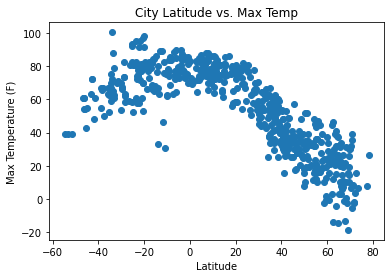

In [55]:
lat_scatter_plot("Max Temp", "Max Temperature (F)")

## Latitude vs. Humidity Plot

In [56]:
def lat_scatter_plot(y_axis, y_label):
    x_axis= weather_df["Lat"]
    plt.scatter(x_axis, weather_df[y_axis])
    
    plt.title(f'City Latitude vs. {y_axis}')
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    
    plt.show()

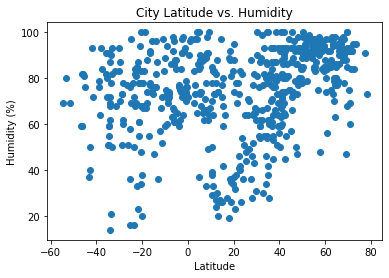

In [57]:
lat_scatter_plot("Humidity", "Humidity (%)")

## Latitude vs. Cloudiness Plot

In [12]:
def lat_scatter_plot(y_axis, y_label):
    x_axis= weather_df["Lat"]
    plt.scatter(x_axis, weather_df[y_axis])
    
    plt.title(f'City Latitude vs. {y_axis}')
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    
    plt.show()

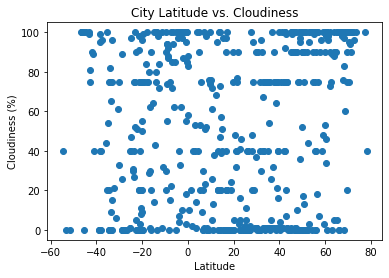

In [13]:
lat_scatter_plot("Cloudiness", "Cloudiness (%)")

## Latitude vs. Wind Speed Plot

In [14]:
def lat_scatter_plot(y_axis, y_label):
    x_axis= weather_df["Lat"]
    plt.scatter(x_axis, weather_df[y_axis])
    
    plt.title(f'City Latitude vs. {y_axis}')
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    
    plt.show()

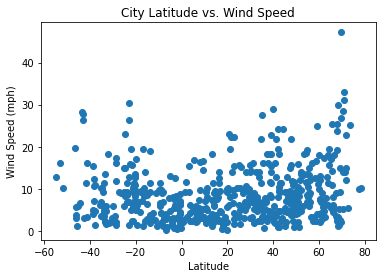

In [15]:
lat_scatter_plot("Wind Speed", "Wind Speed (mph)")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8926922464151054


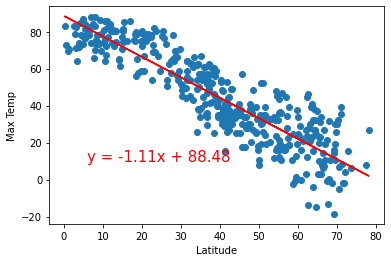

In [65]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
n_hem= weather_df.loc[weather_df["Lat"]> 0.0]

x_values = n_hem["Lat"]
y_values = n_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()


The r-value is: 0.46937863826630627


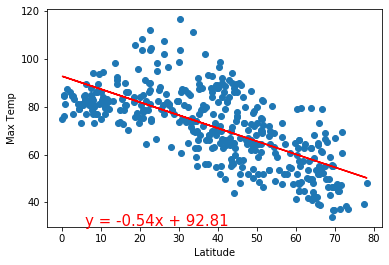

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5037923280357751


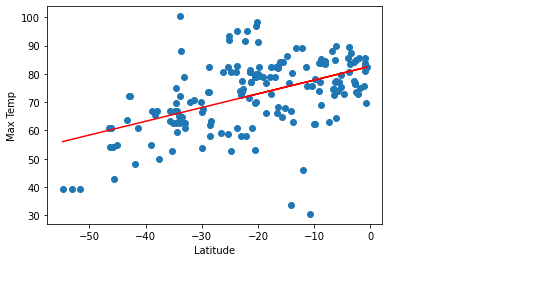

In [67]:
s_hem= weather_df.loc[weather_df["Lat"]< 0.0]

x_values = s_hem["Lat"]
y_values = s_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.6082708688906918


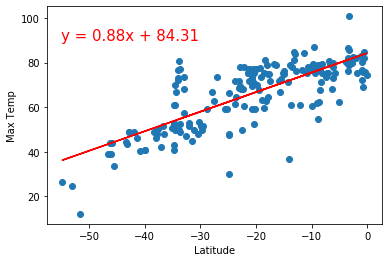

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


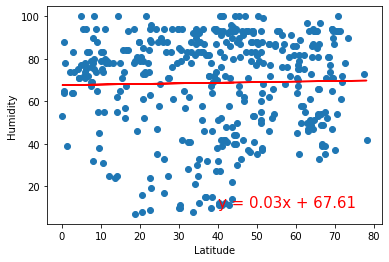

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


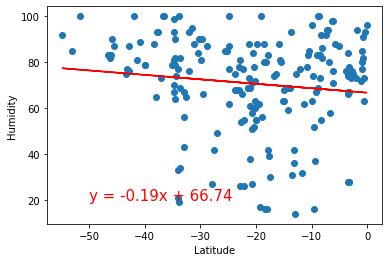

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


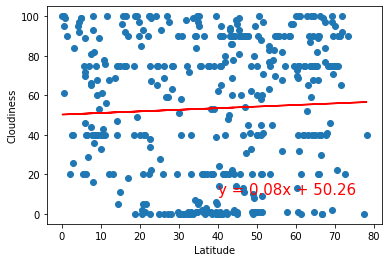

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


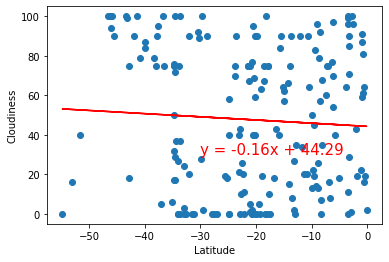

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


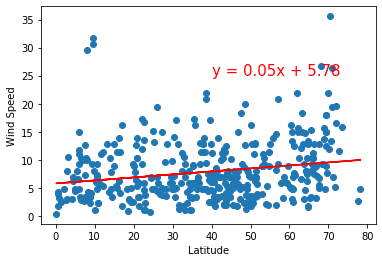

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


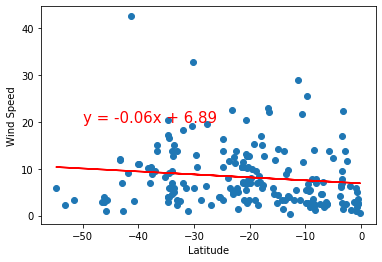